# Lending Club Case Study

**Problem Statement**

You work for a consumer finance company which specialises in lending various types of loans to urban customers

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

When a person applies for a loan, there are two types of decisions that could be taken by the company:

  **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
  

  1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

  2. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

  3. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
  

  **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

**Analysis**

The data is analysed through three stages: 
   1. Data Cleaning 
        - Null value handling
        - Dropping columns which are not require for analysis
        - Handling data type mismatches
   2. Data Analysis
       - Univariate analysis
       - Bivariate analysis
   3. Indentifying the key driving factors   


In [1]:
# Importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Setting maximum number of rows and column to get full details of row and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [110]:
#Read the csv data file
data = pd.read_csv('loan.csv', low_memory=False)

In [111]:
#viewing the first 5 data
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [112]:
#Get the number of rows and columns
data.shape

(39717, 111)

## Data Cleaning

**Null value handling**

In [113]:
#Check for null values
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


There are significant number of null values in most of the columns and few are having complete null values. So lets handle the null values by removing the null values

In [114]:
#Take the percentage of null values in each column
null_data_perc= round(((data.isnull().sum())/len(data))*100,2)
print(null_data_perc)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [115]:
#Drop columns which is having more than 50% null values
data.drop(null_data_perc[null_data_perc >50].index,axis='columns',inplace=True)

In [116]:
#Check the shape of the dataframe
data.shape

(39717, 54)

In [117]:
#Finding columns which have same values across all rows for each column using nunique() function
data.columns[data.nunique()<=1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [118]:
#Droping columns which have same values across all rows
data.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],axis='columns',inplace=True)

In [119]:
#Check the shape of the dataframe
data.shape

(39717, 45)

Currently we have 45 columns left, check for null values to get if there are other null values present in the exsisting columns

In [120]:
#Take the percentage of null values in each column
round(((data.isnull().sum())/len(data))*100,2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util

emp_title,emp_length,desc,title,pub_rec_bankruptcies,revol_util,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies have null values present in the columns so we can clear those null values to get a clean data

**Dropping columns which are not require for analysis**

columns: [last_pymnt_amnt,last_pymnt_d, last_credit_pull_d, collection_recovery_fee, recoveries, total_rec_int       total_rec_late_fee, total_rec_prncp, total_pymnt_inv , total_pymnt, revol_bal, out_prncp ] all these are attributes which comes after loan approval. So we can remove those columns
 
columns: [id, member_id, url, desc, title, zip_code, addr_state] can also be removed as this is not required for analysis.

In [121]:
data.drop(['last_pymnt_amnt','last_pymnt_d','last_credit_pull_d','collection_recovery_fee','recoveries','total_rec_int','total_rec_late_fee','total_rec_prncp','total_pymnt_inv','total_pymnt','revol_bal','out_prncp','id','member_id','url','desc','title','zip_code','addr_state'],axis='columns',inplace=True)

In [122]:
#Check the shape of the dataframe
data.shape

(39717, 26)

In [123]:
# check for null values percentage again
round(((data.isnull().sum())/len(data))*100,2)

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
dti                     0.00
delinq_2yrs             0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_util              0.13
total_acc               0.00
out_prncp_inv           0.00
pub_rec_bankruptcies    1.75
dtype: float64

**Remove remaining null value to get a clean data**

In [124]:
#Removing null values in emp_title,emp_length and pub_rec_bankruptcies
data.dropna(axis=0, how='any', inplace=True)

In [125]:
#Check the shape of the dataframe
data.shape

(36502, 26)

Now we have 26 columns in total which contains clean data. Now we need to analyse each columns for the type and also round off the float values to 2 decimal places if exsist.

**Handling data type mismatches**

In [126]:
#Get the info to view the dtypes of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36502 entries, 1 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36502 non-null  int64  
 1   funded_amnt           36502 non-null  int64  
 2   funded_amnt_inv       36502 non-null  float64
 3   term                  36502 non-null  object 
 4   int_rate              36502 non-null  object 
 5   installment           36502 non-null  float64
 6   grade                 36502 non-null  object 
 7   sub_grade             36502 non-null  object 
 8   emp_title             36502 non-null  object 
 9   emp_length            36502 non-null  object 
 10  home_ownership        36502 non-null  object 
 11  annual_inc            36502 non-null  float64
 12  verification_status   36502 non-null  object 
 13  issue_d               36502 non-null  object 
 14  loan_status           36502 non-null  object 
 15  purpose            

term, int_rate, emp_length, revol_util are quantitative values for need to convert them to float and int types

In [127]:
#view the column details of first 5 rows again to check for dtype mismatches
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp_inv,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,9.40%,4,0.00,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,21%,37,0.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,15,0,53.90%,38,524.06,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,28.30%,12,0.00,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,0,Jul-05,1,7,0,85.60%,11,0.00,0.0


In [128]:
#Analysing term column
print('Actual Data:\n', data.term.value_counts())
#Remove the months from the term by fetching only the number data from terms column
data.term=data.term.apply(lambda x:re.sub('[^0-9]', '', x))
#Convert the term column to type int
data.term =data.term.astype("int64")
print('Modified Data:\n', data.term.value_counts())

Actual Data:
  36 months    26428
 60 months    10074
Name: term, dtype: int64
Modified Data:
 36    26428
60    10074
Name: term, dtype: int64


In [129]:
#Analysing int_rate column
print('Actual Data:\n', data.int_rate.value_counts())
#Remove percentage symbol for interest rate
data.int_rate = data.int_rate.apply(lambda x:x.replace("%",""))
#Convert the int_rate column to type float
data.int_rate = data.int_rate.astype('float64')
print('Modified Data:\n', data.int_rate.value_counts())

Actual Data:
 10.99%    901
13.49%    787
11.49%    772
7.51%     732
7.88%     674
7.49%     616
11.71%    573
9.99%     567
7.90%     537
5.42%     505
11.99%    503
12.69%    468
10.37%    433
8.49%     418
12.42%    417
12.99%    409
10.65%    404
6.03%     399
5.79%     380
14.27%    368
8.90%     366
11.86%    365
7.29%     363
9.63%     360
6.62%     358
9.91%     336
10.59%    336
7.14%     316
5.99%     314
11.11%    313
6.99%     311
16.77%    308
12.53%    307
6.54%     295
10.74%    294
13.61%    285
6.91%     282
13.98%    270
8.94%     269
15.99%    267
7.66%     264
13.23%    252
13.99%    247
11.12%    237
11.36%    236
10.00%    236
12.68%    235
10.36%    235
10.75%    233
6.17%     231
16.49%    228
18.25%    215
10.62%    210
10.38%    209
13.06%    207
14.65%    206
10.25%    204
11.83%    202
15.23%    199
14.96%    199
16.89%    198
15.65%    196
15.95%    194
12.18%    190
17.27%    187
15.27%    187
6.92%     186
16.32%    186
11.14%    185
17.49%    179
9.32% 

In [133]:
#Analysing emp_length column
print('Actual Data:\n', data.emp_length.value_counts())
#Removing symbol and strings from employment length data
data.emp_length = data.emp_length.apply(lambda x:re.sub('[^0-9]', '', x))
#Convert type of employment length to int
data.emp_length=data.emp_length.astype('int64')
print('Modified Data:\n', data.emp_length.value_counts())

Actual Data:
 10+ years    8416
2 years      4184
< 1 year     4060
3 years      3921
4 years      3305
5 years      3140
1 year       3036
6 years      2123
7 years      1698
8 years      1408
9 years      1211
Name: emp_length, dtype: int64
Modified Data:
 10    8416
1     7096
2     4184
3     3921
4     3305
5     3140
6     2123
7     1698
8     1408
9     1211
Name: emp_length, dtype: int64


In [134]:
#Analysing revol_util column
print('Actual Data:\n', data.revol_util.value_counts())
#Remove percentage symbol from revol_util
data.revol_util=data.revol_util.apply(lambda x: x.replace("%",''))
#convert type of revol_util to float
data.revol_util=data.revol_util.astype("float64")
print('Modified Data:\n', data.revol_util.value_counts())

Actual Data:
 0%        854
0.20%      58
64.80%     55
66.60%     55
70.40%     55
61%        55
63%        54
78.70%     53
37.60%     53
32%        53
46.40%     53
40.70%     53
68.70%     52
51.60%     52
27.20%     52
0.10%      52
66.70%     52
57.40%     52
46.60%     51
66.10%     51
70.80%     51
70.10%     51
29.10%     51
62.80%     51
65.90%     51
41%        51
31.20%     51
75.50%     50
48.90%     50
48.20%     50
51.50%     50
68.60%     50
60.20%     50
54.60%     50
89.50%     50
64.60%     50
25.50%     50
54.30%     50
36.50%     49
76.60%     49
43.40%     49
62.30%     49
74.90%     49
23.70%     49
66.90%     49
55.80%     49
35.30%     49
35.70%     49
89.90%     49
72.10%     49
52.40%     48
58.70%     48
49.80%     48
48%        48
45.90%     48
55.50%     48
73.20%     48
45.60%     48
40.20%     48
53.90%     48
47.80%     48
54%        48
44.70%     47
70%        47
79.70%     47
55.20%     47
57.70%     47
57.90%     47
51.10%     47
57.20%     47
41.40%

In [135]:
#Check the info to view the dtypes of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36502 entries, 1 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36502 non-null  int64  
 1   funded_amnt           36502 non-null  int64  
 2   funded_amnt_inv       36502 non-null  float64
 3   term                  36502 non-null  int64  
 4   int_rate              36502 non-null  float64
 5   installment           36502 non-null  float64
 6   grade                 36502 non-null  object 
 7   sub_grade             36502 non-null  object 
 8   emp_title             36502 non-null  object 
 9   emp_length            36502 non-null  int64  
 10  home_ownership        36502 non-null  object 
 11  annual_inc            36502 non-null  float64
 12  verification_status   36502 non-null  object 
 13  issue_d               36502 non-null  object 
 14  loan_status           36502 non-null  object 
 15  purpose            

Data is now fully cleaned. Issues with null values and Dtypes where handled in stage.

## Data Analysis

Loan status is the main parameter than can be used to get the key driving factors behind the loan default. We have fully paid, current and charged off scenarios. Since Current is the applicants who are in the process of paying instalments so current can be removed from the data.

Also, we need to convert the fullypaid and charged off scenarios to a quantitative value for analysing the percentages.

In [141]:
# Analysing the loan status data
data.loan_status.value_counts()

Fully Paid     30432
Charged Off     5004
Current         1066
Name: loan_status, dtype: int64

In [145]:
#Removing current loan status and keeping only the fully paid and charged off loan status
data_modified = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [146]:
# Target is 'default user' so convert loan status to quantitative data
#Assigning 1 for 'Charged Off and 0 for 'Fullypaid'
data_modified['loan_status_converted'] = data_modified.loan_status.apply(lambda x:1 if x =='Charged Off' else 0)

Create bins for int_rate, loan_amnt, annual_inc, and dti

In [150]:
#Describe interest rate to get range for binning
data_modified.int_rate.describe()

count    35436.000000
mean        11.987330
std          3.702834
min          5.420000
25%          8.940000
50%         11.860000
75%         14.500000
max         24.400000
Name: int_rate, dtype: float64

In [151]:
#Describe loan amount to get range for binning  
data.loan_amnt.describe()

count    36502.000000
mean     11303.084762
std       7435.236823
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [152]:
#Describe annual income to get range for binning 
data.annual_inc.describe()

count    3.650200e+04
mean     6.926370e+04
std      6.349653e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [153]:
#Describe dti ratio to get range for binning 
data.dti.describe()

count    36502.000000
mean        13.441777
std          6.643955
min          0.000000
25%          8.350000
50%         13.535000
75%         18.690000
max         29.990000
Name: dti, dtype: float64

In [336]:
#Create bins for interest rate
# From above data we can get the maximum and minimum value present
data_modified['int_rate_bins']=pd.cut(x = data_modified['int_rate'], bins = [0,10,20,30], labels=['0-10','10-20','20+'])

In [156]:
#Create bins for loan amount
# From above data we can get the maximum and minimum value present
data_modified['loan_amnt_bins']=pd.cut(x = data_modified['loan_amnt'], bins = [0,5000,10000,15000,20000,25000,30000,35000], labels=['0-5000', '5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000'])

In [157]:
#Create bins for annual income
# From above data we can get the maximum and minimum value present
# Here we are using quantile cut to eliminate the outliers in annual income
data_modified['annual_inc_bins'] = pd.qcut(data_modified.annual_inc, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [158]:
#Create bins for dti
# From above data we can get the maximum and minimum value present
data_modified['dti_bins']=pd.cut(x = data_modified['dti'], bins = [0,10,20,30], labels=['0-10', '10-20','20+'])

In [164]:
# Getting the column numbers and columns\
print("Rows x Columns:", data_modified.shape)
print("Available columns:", data_modified.columns)

Rows x Columns: (35436, 31)
Available columns: Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp_inv', 'pub_rec_bankruptcies', 'loan_status_converted',
       'int_rate_bins', 'loan_amnt_bins', 'annual_inc_bins', 'dti_bins'],
      dtype='object')


**Univariate analysis**

Setting the Default rate as the base data for anlysis

In [337]:
# Since there will be multiple plots for analysing data, we can create a global function to view the data.
def univariate_plot_1(attribute, x_label, title):
    sns.lineplot(data = data_modified, x = attribute, y = 'loan_status_converted', ci = None, estimator =lambda x: sum(x)/len(x) * 100)
    plt.ylabel('Default Rate in %')
    plt.xlabel(x_label)
    plt.title(title)
def univariate_plot_2(attribute, x_label, title):
    plots = sns.barplot(data = data_modified, x = attribute, y = 'loan_status_converted', ci = None, estimator =lambda x: sum(x)/len(x) * 100)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(0, 8), 
                   textcoords='offset points')
    plt.ylabel('Default Rate in %')
    plt.xlabel(x_label)
    plt.title(title)

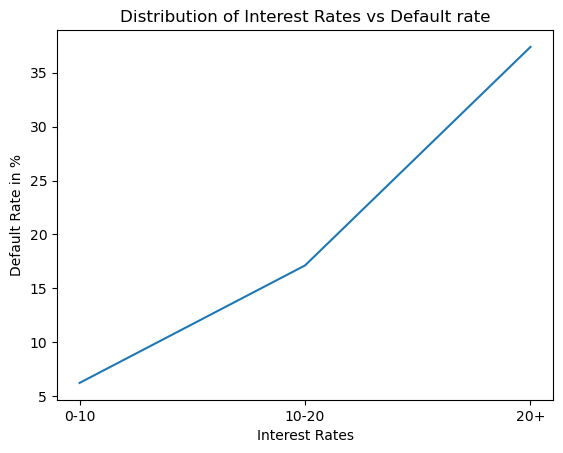

In [338]:
#Interest Rates vs Default rate
univariate_plot_1('int_rate_bins','Interest Rates', 'Distribution of Interest Rates vs Default rate')

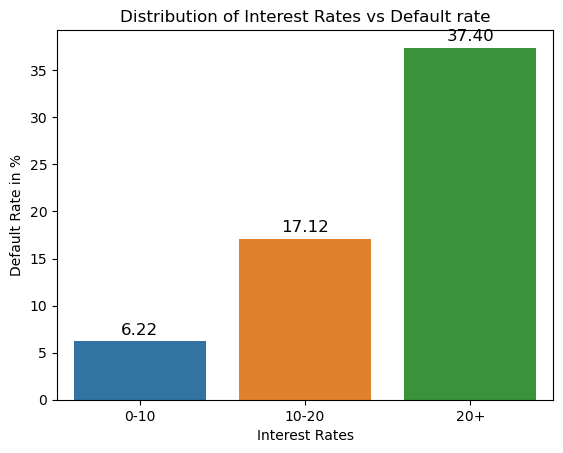

In [339]:
#Interest Rates vs Default rate
univariate_plot_2('int_rate_bins','Interest Rates', 'Distribution of Interest Rates vs Default rate')

**Inference:**

Loans having interest rate more than 20% are likely to be defaulted. There is a contant increase in the default rate with the interest rate

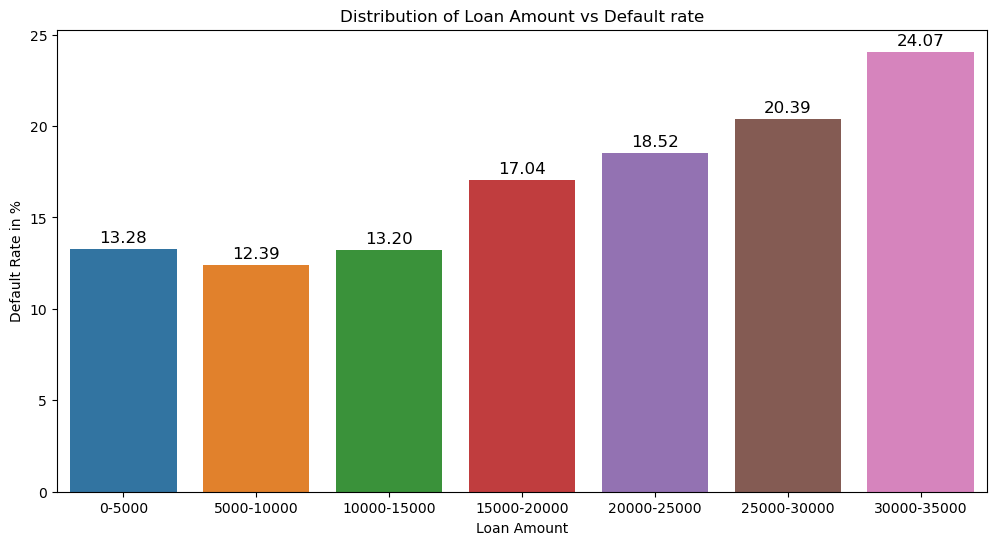

In [340]:
#Loan Amount vs Default rate
plt.figure(figsize=(12,6))
univariate_plot_2('loan_amnt_bins','Loan Amount', 'Distribution of Loan Amount vs Default rate')
plt.show()

**Inference:**

Loan amounts which are greater than 15k is likely to be defaulted as we can see that there is an increase in the percentage for amount greater than 15k and the amounts less than 15k is likely to have lesser default rate.

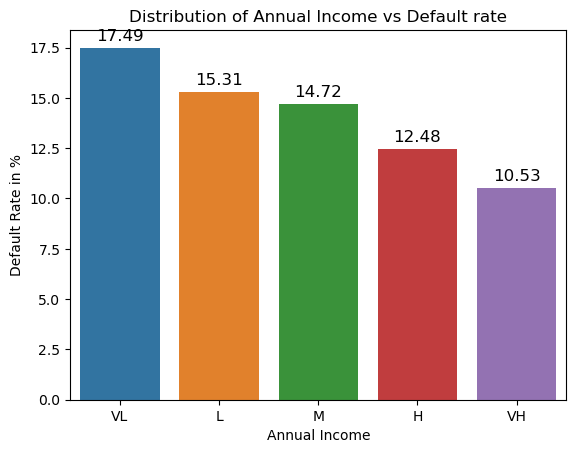

In [341]:
#Annual Income vs Default rate
univariate_plot_2('annual_inc_bins','Annual Income', 'Distribution of Annual Income vs Default rate')

**Inference:**
    
Default rate is higher for  annual income which comes under very low category. The changes of defaulting is high for people having very low income.

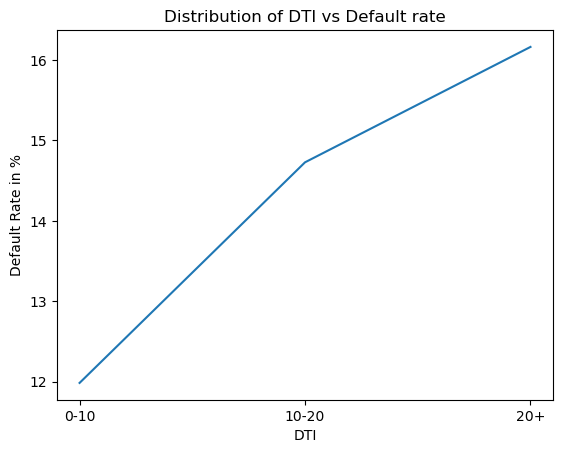

In [342]:
#DTI vs Default rate
univariate_plot_1('dti_bins', 'DTI', 'Distribution of DTI vs Default rate')

**Inference**

Default rating is high for dti rate more than 20% which means there is a clear chance of defaulting for higher dti rating.

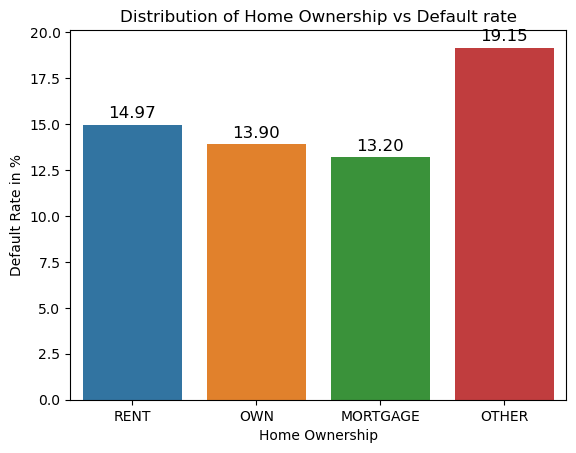

In [343]:
#Home Ownership vs Default rate
univariate_plot_2('home_ownership', 'Home Ownership', 'Distribution of Home Ownership vs Default rate')

**Inference:**

Other category owership people have higher default rate which means there is a high change of defaulting for other category home owners

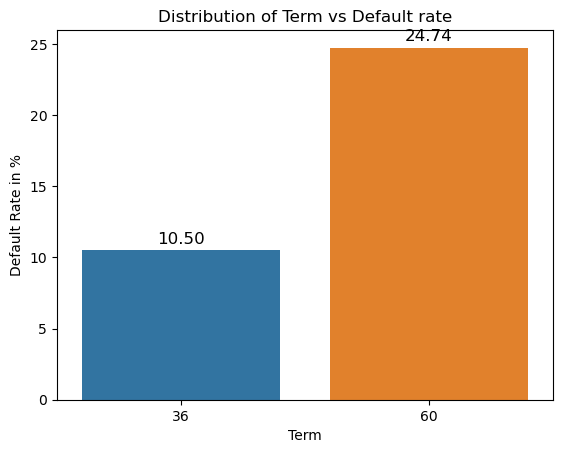

In [344]:
#Term vs Default rate
univariate_plot_2('term', 'Term', 'Distribution of Term vs Default rate' )

**Inference:**

Default rate is higher for 60 month term. So the risk is higher for 60 months terms compared to 36 months

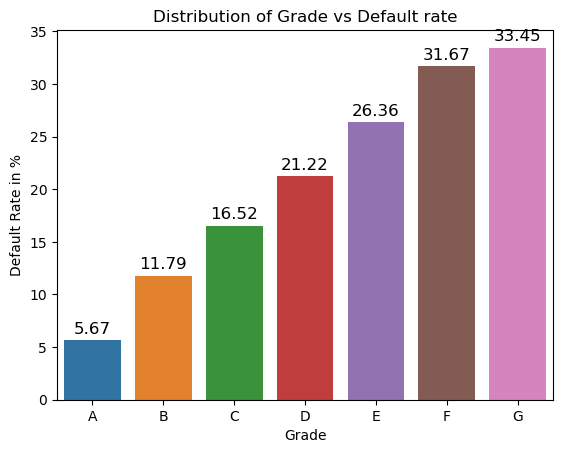

In [345]:
# Grade vs Default rate
data_modified['grade'] = data_modified.grade.astype('category')
univariate_plot_2('grade','Grade', 'Distribution of Grade vs Default rate' )

**Inference:**

E, F, G are having higher default rating so they comes under the risky category

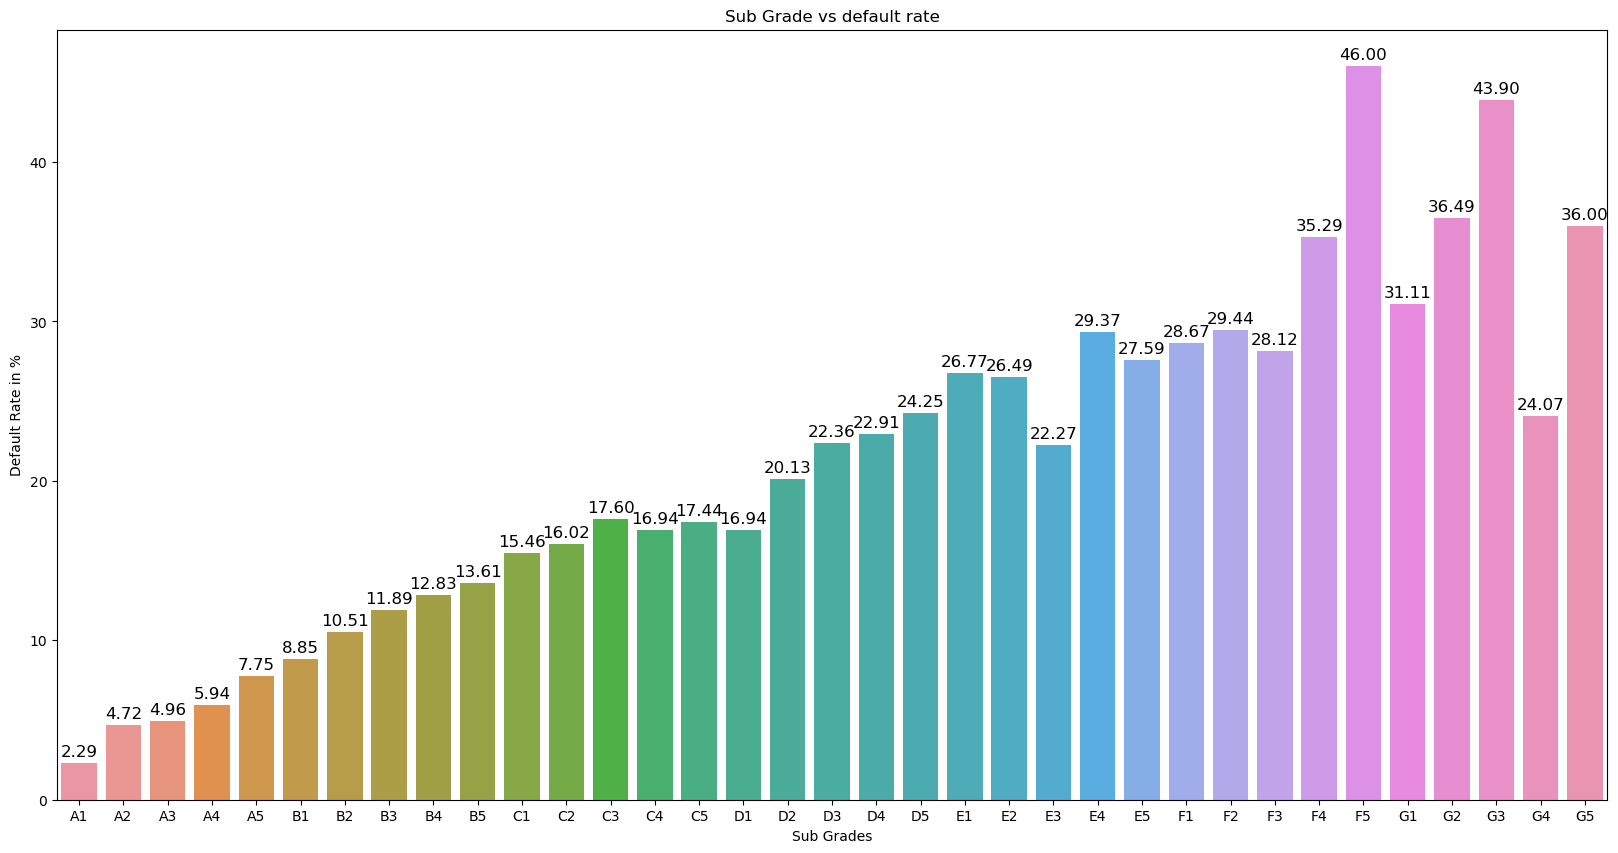

In [346]:
#Sub Grade vs default rate
plt.figure(figsize=(20,10))
data_modified['sub_grade'] = data_modified.sub_grade.astype('category')
univariate_plot_2('sub_grade', 'Sub Grades', 'Sub Grade vs default rate')

**Inference:**

Sub grades E F and G have higher default ratings so this matches with the distribution of grades vs default rate

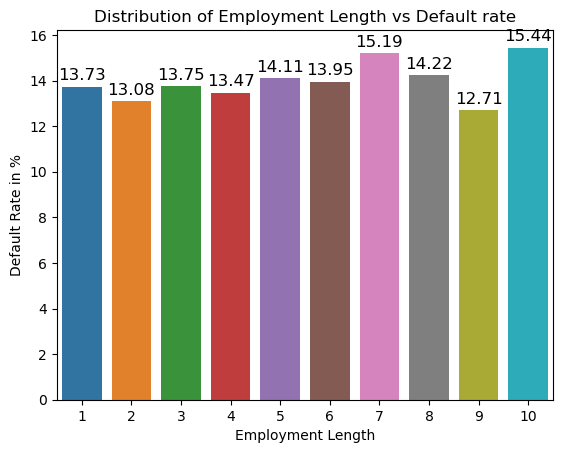

In [347]:
univariate_plot_2('emp_length','Employment Length','Distribution of Employment Length vs Default rate' )

**Inference:**

There is no significant inference from employment length as all are having similar default rates.

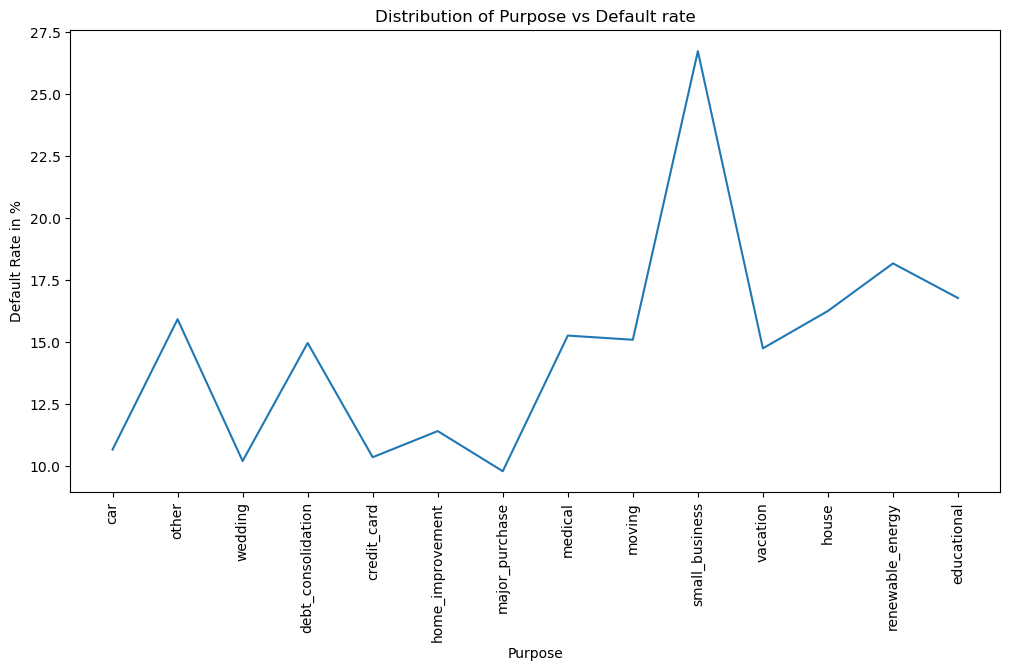

In [348]:
plt.figure(figsize=(12,6))
univariate_plot_1('purpose', 'Purpose','Distribution of Purpose vs Default rate' )
plt.xticks(rotation=90)
plt.show()

**Inference:**

Small business have higher default rate among others and others loan purpose is having almost similar default percentages.

## Bivariate Analysis

In [355]:
#Global function for bivariate analysis
def bivariate_plot(x_attribute,hue_attribute,title, x_label):
    out = sns.barplot(data = data_modified, x = x_attribute, y ='loan_status_converted',hue=hue_attribute, ci=None,  estimator =lambda x: sum(x)/len(x) * 100)
    for plot in out.patches:
        out.annotate(format(plot.get_height(), '.2f'),  
                   (plot.get_x() + plot.get_width() / 2,  
                    plot.get_height()), ha='center', va='center', 
                   size=10, xytext=(1, 7), 
                   textcoords='offset points')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Default Rate in %')

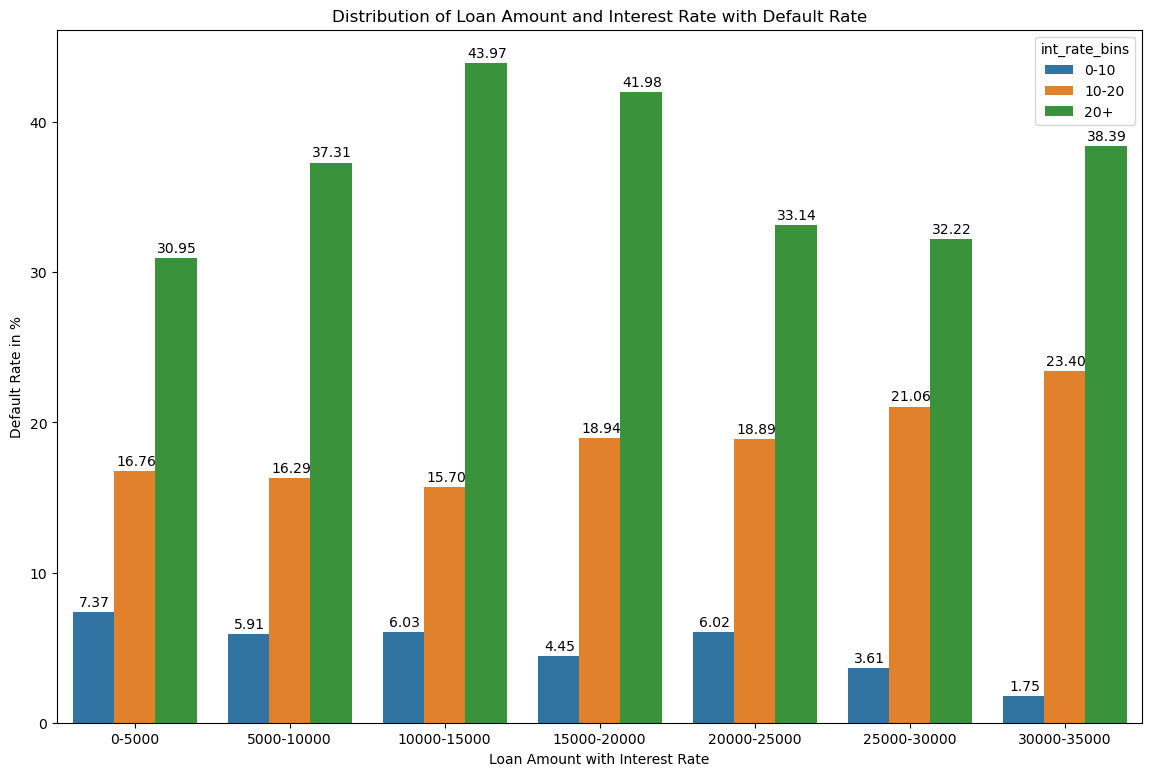

In [359]:
#Loan Amount and Interest Rate with Default Rate
plt.figure(figsize=(14,9))
bivariate_plot('loan_amnt_bins','int_rate_bins', 'Distribution of Loan Amount and Interest Rate with Default Rate', 'Loan Amount with Interest Rate')
plt.show()

**Inference:**

Loan Amount between 5000 to 20000 with interest rate more than 20% have greater default rates which is likely to have chance of defaulting.  

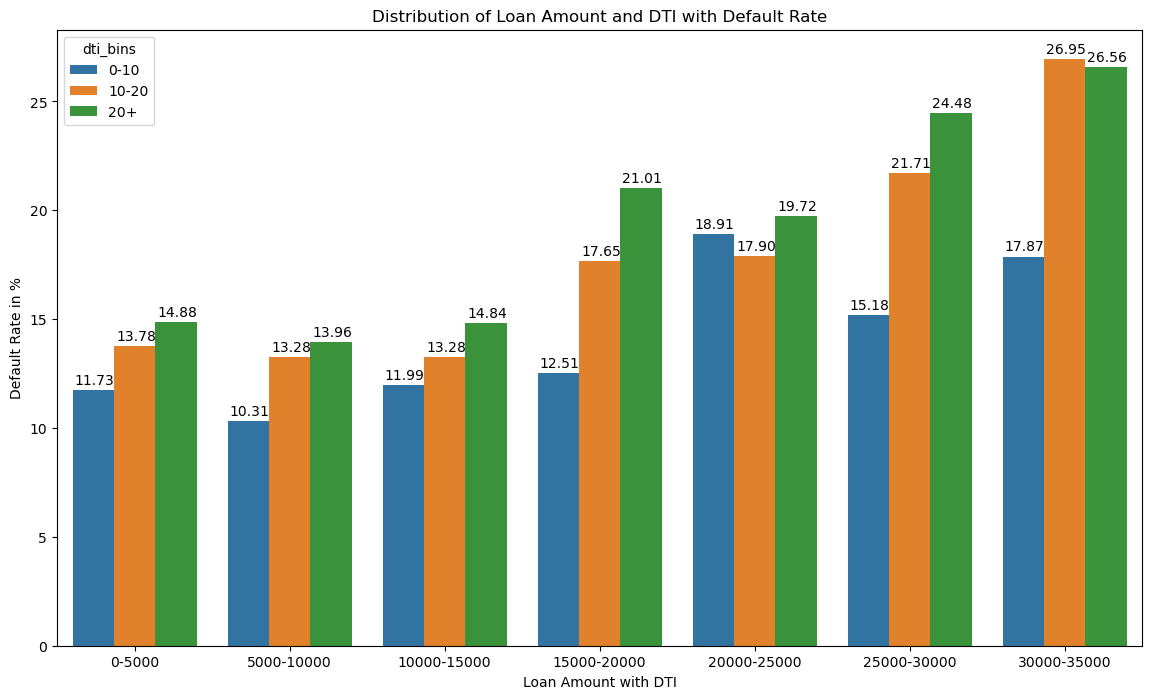

In [358]:
#Loan Amount and DTI with Default Rate
plt.figure(figsize=(14,8))
bivariate_plot('loan_amnt_bins','dti_bins', 'Distribution of Loan Amount and DTI with Default Rate', 'Loan Amount with DTI')


**Inference:**

Higher Loan Amount with DTI has a change of defaulting.

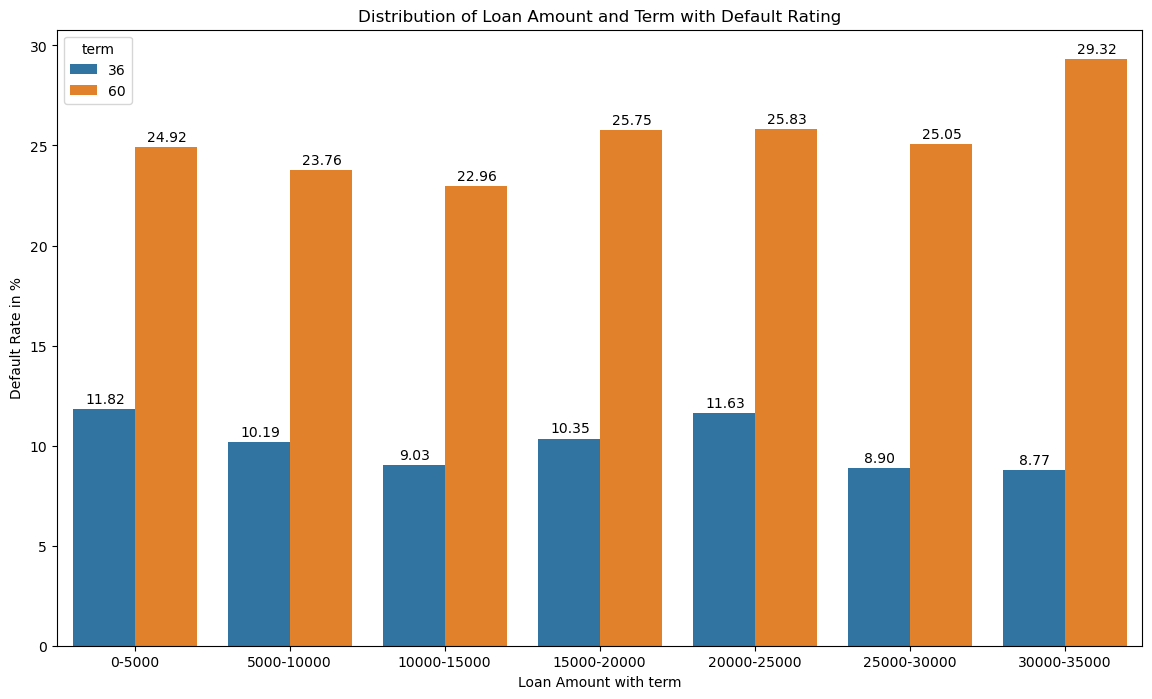

In [353]:
#Loan Amount and Term with Default Rate
plt.figure(figsize=(14,8))
bivariate_analysis_bar_plot('loan_amnt_bins','term', 'Distribution of Loan Amount and Term with Default Rating', 'Loan Amount with term')


**Inference:**

36 months:

Loans where loan amount falls in categories '0-5k' and '20k-25k' are having higher default rating so higher chance of defaulting.

60 months:

Loans where loan amount falls in category '30k-35k' are having higher default rating so higher chance of defaulting.

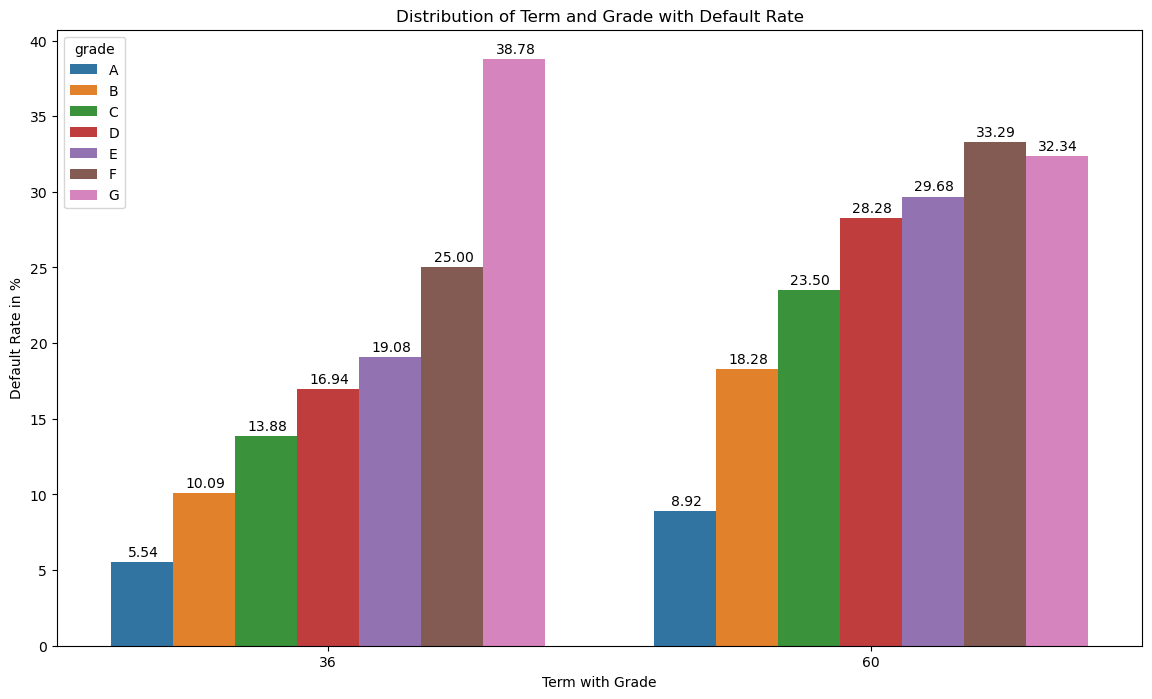

In [363]:
#Term and grade with Default Rate
plt.figure(figsize=(14,8))
bivariate_plot('term','grade', 'Distribution of Term and Grade with Default Rate', 'Term with Grade')

**Inference:**

For 36 months and 60 month term, F and G are having higher default rating percentage. So they are having higher chance of defaulting

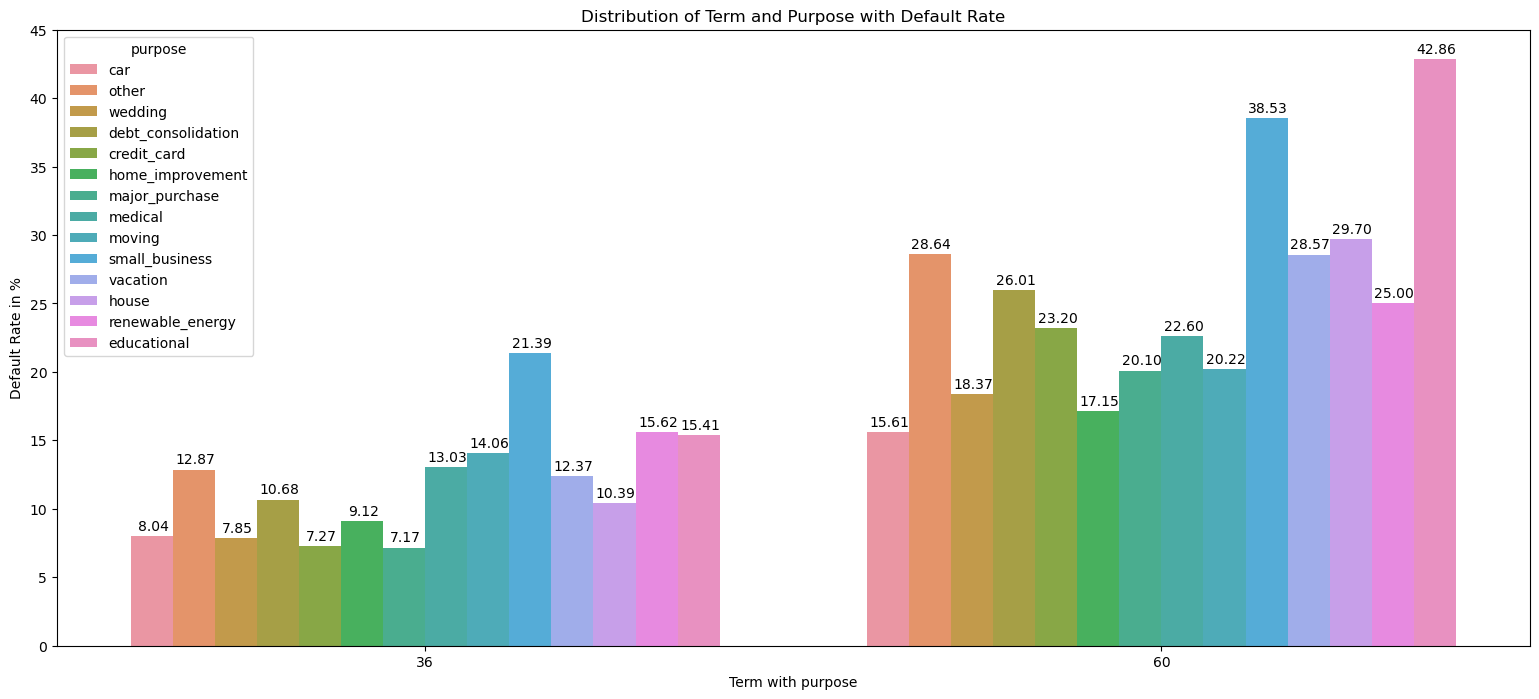

In [366]:
#Term and Purpose with Default Rate
plt.figure(figsize=(19,8))
bivariate_plot('term','purpose', 'Distribution of Term and Purpose with Default Rate', 'Term with purpose')

**Inference:**

For 36 month term, small business is having higher default rating so higher chances of defaulting.

For 60 month term, small business and educational loan is having higher chances of defaulting

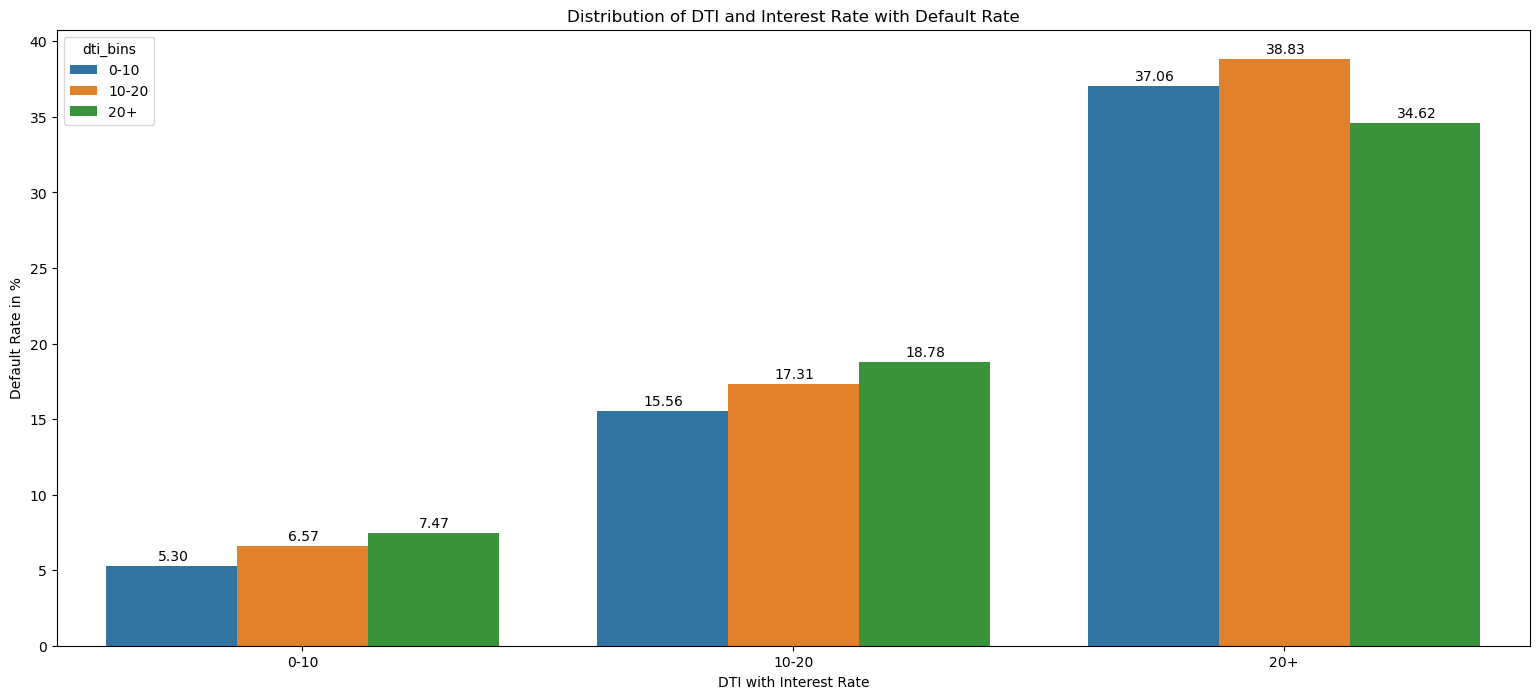

In [368]:
#DTI and Interest Rate with Default Rate
plt.figure(figsize=(19,8))
bivariate_plot('int_rate_bins','dti_bins', 'Distribution of DTI and Interest Rate with Default Rate', 'DTI with Interest Rate')

**Inference:**

For lower interest rates (0-10 and 10-20) default rate increases gradually with dti ratio and for interest rate more than 20% default rate and dti ratio does not have a similar pattern
    

## Identify the key driving factors

In [388]:
# Create a function to identify the key driving factors by taking the difference in percentages of maximum and minimum for each attributes.
driving_factors = {}  # empty dictonary to store the difference values.
def pass_attributes(values):
    for key_factors in values:
      calc_default_rate_difference(key_factors)
    driving_factors_sorted = sorted(driving_factors.items(), key=lambda x: x[1], reverse=True)

    # converting into type dict
    driving_factors_sorted  = dict(driving_factors_sorted[:])

    #Taking Transpose
    driving_factors_sorted = pd.DataFrame.from_dict([driving_factors_sorted]).T
    driving_factors_sorted
    print(driving_factors_sorted)


#Function to  create a pivot table by passing values as default rate and index as the attribute values. This will populate the key driving factors dictionary variable.    
def calc_default_rate_difference(attribute):
  res = pd.pivot_table(data = data_modified ,values = 'loan_status_converted',index = attribute, aggfunc=lambda y:int(sum(y)/len(y) * 100))
  driving_factors[attribute]= res.values.max() - res.values.min()

In [390]:
pass_attributes(['grade','dti_bins', 'purpose','int_rate_bins','emp_length', 'home_ownership','loan_amnt_bins', 'annual_inc_bins','term'])

                  0
int_rate_bins    31
grade            28
purpose          17
term             14
loan_amnt_bins   12
annual_inc_bins   7
home_ownership    6
dti_bins          5
emp_length        3
